In [ ]:
#Inferencia Estadística - CLASIFICACIÓN
#Alumnos: Cardozo Rodrigo, Larregle Matias, Levy Lara y Tarizzo Facundo

#CONCLUSIÓN FINAL:
#Luego de analizar los distintos métodos de clasificación llegamos a la conclusión de que, en este caso, el Discriminante Lineal es el de mejor precisión.

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Cargar base de datos a drive
from google.colab import drive
drive.mount('/content/drive')

url = "/content/drive/MyDrive/Claseficación_banco.csv"

df = pd.read_csv(url)

Mounted at /content/drive


In [ ]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


not.fully.paid
0    8045
1    1533
Name: count, dtype: int64


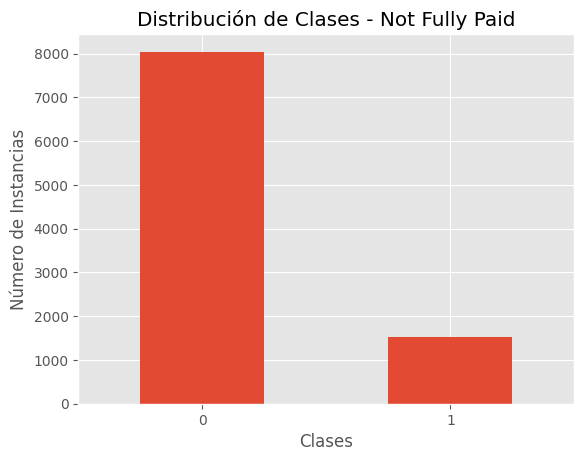

not.fully.paid
0    0.839946
1    0.160054
Name: count, dtype: float64


In [ ]:
#Contar las Clases
class_counts = df['not.fully.paid'].value_counts()
print(class_counts)

#Visualizar la Distribución
class_counts.plot(kind='bar')
plt.title('Distribución de Clases - Not Fully Paid')
plt.xlabel('Clases')
plt.ylabel('Número de Instancias')
plt.xticks(rotation=0)
plt.show()

#Calcular Proporciones
proportions = class_counts / len(df)
print(proportions)

In [ ]:
# Limpiamos datos nulos
df = df.dropna()

# Crear el LabelEncoder
label_encoder = LabelEncoder()

# Crear un diccionario para guardar el mapeo de cada columna
label_encoders = {}

# Aplicar LabelEncoder a cada columna categórica
for column in df.columns:
    if df[column].dtype == object:  # Verifica si la columna es categórica
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le  # Guarda el LabelEncoder para esta columna

# Imprimir el DataFrame transformado
print(df)

# Imprimir el mapeo de cada columna
for column, le in label_encoders.items():
    print(f"Columna: {column}")
    print("Categorías:", le.classes_)
    print("Codificación:", le.transform(le.classes_))
    print()

      credit.policy  purpose  int.rate  installment  log.annual.inc    dti  \
0                 1        2    0.1189       829.10       11.350407  19.48   
1                 1        1    0.1071       228.22       11.082143  14.29   
2                 1        2    0.1357       366.86       10.373491  11.63   
3                 1        2    0.1008       162.34       11.350407   8.10   
4                 1        1    0.1426       102.92       11.299732  14.97   
...             ...      ...       ...          ...             ...    ...   
9573              0        0    0.1461       344.76       12.180755  10.39   
9574              0        0    0.1253       257.70       11.141862   0.21   
9575              0        2    0.1071        97.81       10.596635  13.09   
9576              0        4    0.1600       351.58       10.819778  19.18   
9577              0        2    0.1392       853.43       11.264464  16.28   

      fico  days.with.cr.line  revol.bal  revol.util  inq.last.

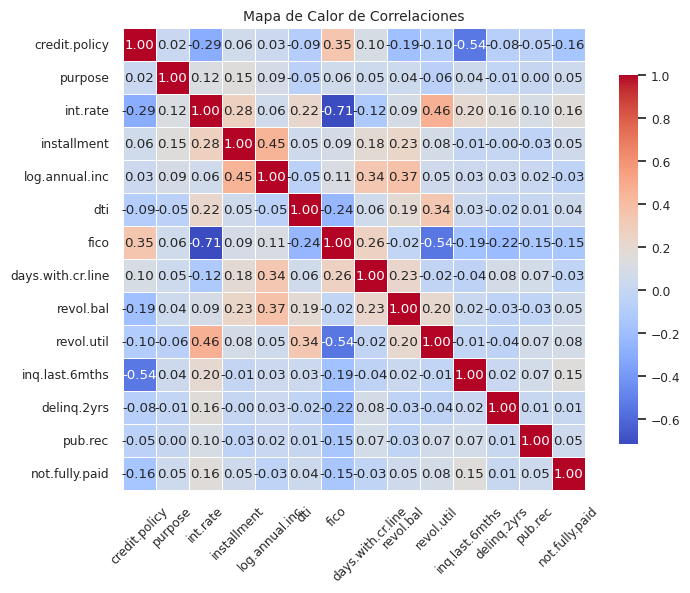

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor tipo cuadriculado para la correlación
plt.figure(figsize=(9, 6))
sns.set(font_scale=0.8)  # Aumentar tamaño de fuente
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
                      square=True, cbar_kws={"shrink": .8},
                      linewidths=0.5)  # Cuadrícula
plt.title('Mapa de Calor de Correlaciones', fontsize=10)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Separar características y etiqueta
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=6)

# Escalar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

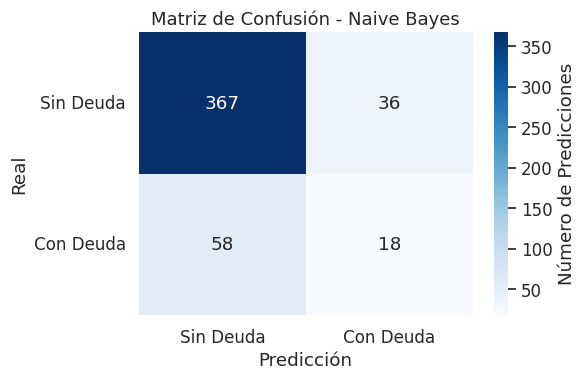

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       403
           1       0.33      0.24      0.28        76

    accuracy                           0.80       479
   macro avg       0.60      0.57      0.58       479
weighted avg       0.78      0.80      0.79       479



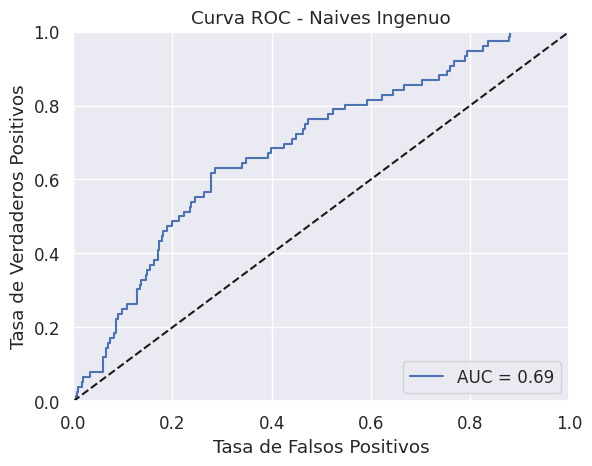

Precisión (Bayes Ingenuo): 0.80


In [ ]:
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Entrenar el modelo
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predecir
y_pred_nb = nb_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Configuración del gráfico
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.1)  # Aumentar el tamaño de la fuente

# Crear un mapa de calor
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                       xticklabels=['Sin Deuda', 'Con Deuda'],
                       yticklabels=['Sin Deuda', 'Con Deuda'],
                       cbar_kws={'label': 'Número de Predicciones'})

# Configurar etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Naive Bayes', fontsize=13)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred_nb))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Naives Ingenuo')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import accuracy_score

# Calcular precisión
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Precisión (Bayes Ingenuo): {accuracy_nb:.2f}")

In [ ]:
print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

Dimensiones del conjunto de entrenamiento: (9099, 13)
Dimensiones del conjunto de prueba: (479, 13)


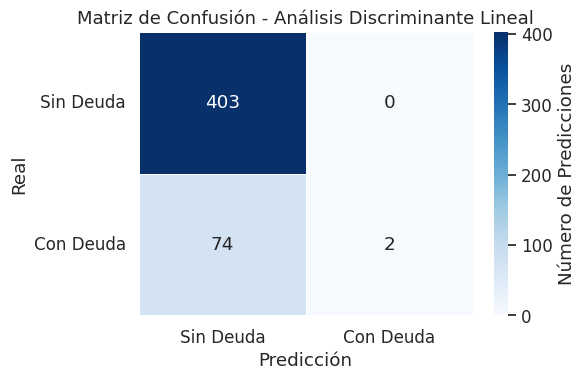

              precision    recall  f1-score     support
0              0.844864  1.000000  0.915909  403.000000
1              1.000000  0.026316  0.051282   76.000000
accuracy       0.845511  0.845511  0.845511    0.845511
macro avg      0.922432  0.513158  0.483596  479.000000
weighted avg   0.869478  0.845511  0.778724  479.000000


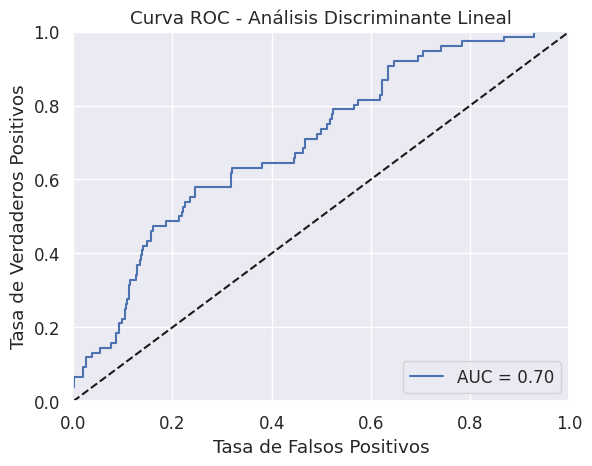

Precisión (Análisis Discriminante Lineal): 0.85


In [ ]:
import numpy as np
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Entrenar el modelo
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Predecir
y_pred_lda = lda_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_lda)

# Configuración del gráfico para la matriz de confusión
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.1)  # Aumentar el tamaño de la fuente

# Crear un mapa de calor para la matriz de confusión
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                       xticklabels=['Sin Deuda', 'Con Deuda'],
                       yticklabels=['Sin Deuda', 'Con Deuda'],
                       cbar_kws={'label': 'Número de Predicciones'},
                       linewidths=.5)

# Configurar etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Análisis Discriminante Lineal', fontsize=13)
plt.xticks(rotation=0)
plt.yticks(rotation=0)


# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Generar el informe de clasificación
report = classification_report(y_test, y_pred_lda, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Imprimir el informe de clasificación
print(report_df)

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, lda_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Análisis Discriminante Lineal')
plt.legend(loc="lower right")
plt.show()

# Calcular precisión
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f"Precisión (Análisis Discriminante Lineal): {accuracy_lda:.2f}")

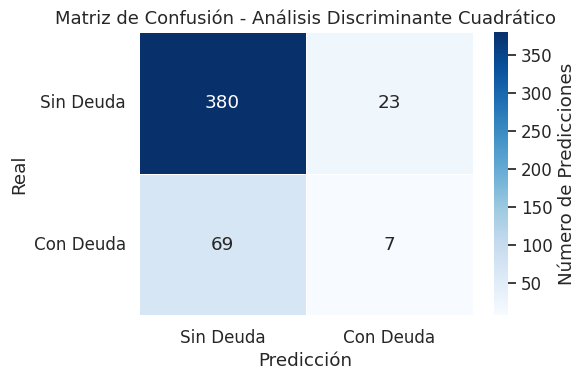

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       403
           1       0.23      0.09      0.13        76

    accuracy                           0.81       479
   macro avg       0.54      0.52      0.51       479
weighted avg       0.75      0.81      0.77       479



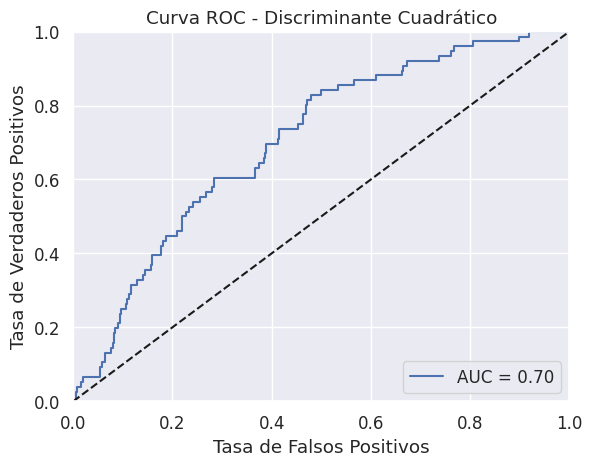

Precisión (Discriminante Cuadrático): 0.81


In [ ]:
import numpy as np
import seaborn as sns
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Entrenar el modelo
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# Predecir
y_pred_qda = qda_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_qda)

# Configuración del gráfico
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.1)  # Aumentar el tamaño de la fuente

# Crear un mapa de calor para la matriz de confusión
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                       xticklabels=['Sin Deuda', 'Con Deuda'],
                       yticklabels=['Sin Deuda', 'Con Deuda'],
                       cbar_kws={'label': 'Número de Predicciones'},
                       linewidths=.5)

# Configurar etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Análisis Discriminante Cuadrático', fontsize=13)
plt.xticks(rotation=0)
plt.yticks(rotation=0)


# Mostrar el gráfico
plt.tight_layout()
plt.show()

print(classification_report(y_test, y_pred_qda))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, qda_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Discriminante Cuadrático')
plt.legend(loc="lower right")
plt.show()

# Calcular precisión
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print(f"Precisión (Discriminante Cuadrático): {accuracy_qda:.2f}")

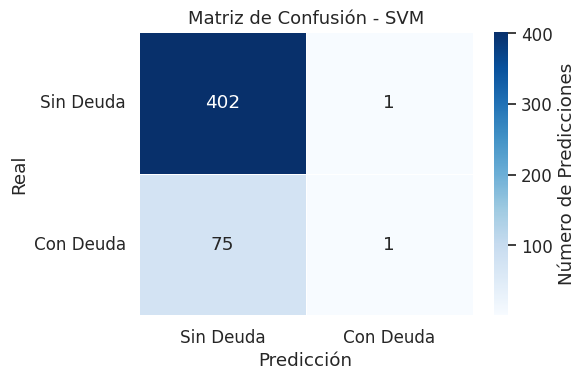

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       403
           1       0.50      0.01      0.03        76

    accuracy                           0.84       479
   macro avg       0.67      0.51      0.47       479
weighted avg       0.79      0.84      0.77       479



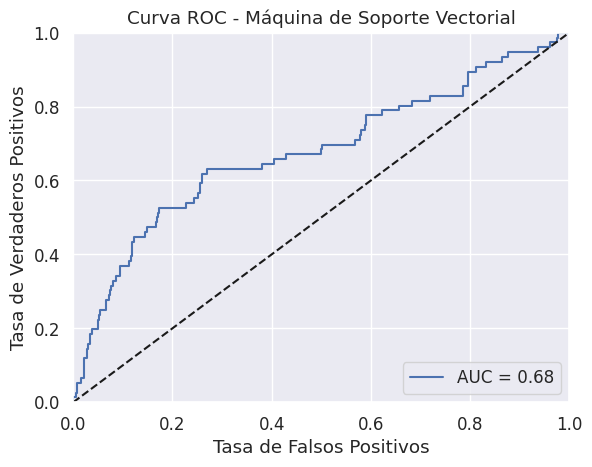

Precisión (Máquina de Soporte Vectorial): 0.84


In [ ]:
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Entrenar el modelo
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Predecir
y_pred_svm = svm_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Configuración del gráfico para la matriz de confusión
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.1)  # Aumentar el tamaño de la fuente

# Crear un mapa de calor para la matriz de confusión
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                       xticklabels=['Sin Deuda', 'Con Deuda'],
                       yticklabels=['Sin Deuda', 'Con Deuda'],
                       cbar_kws={'label': 'Número de Predicciones'},
                       linewidths=.5)

# Configurar etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - SVM', fontsize=13)
plt.xticks(rotation=0)
plt.yticks(rotation=0)


# Mostrar el gráfico
plt.tight_layout()
plt.show()
print(classification_report(y_test, y_pred_svm))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Máquina de Soporte Vectorial')
plt.legend(loc="lower right")
plt.show()

# Calcular precisión
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Precisión (Máquina de Soporte Vectorial): {accuracy_svm:.2f}")

Resultados para Naive Bayes:
Precisión: 0.81
Informe de Clasificación:
              precision    recall  f1-score   support

   Sin Deuda       0.85      0.94      0.89       403
   Con Deuda       0.25      0.11      0.15        76

    accuracy                           0.81       479
   macro avg       0.55      0.52      0.52       479
weighted avg       0.75      0.81      0.77       479




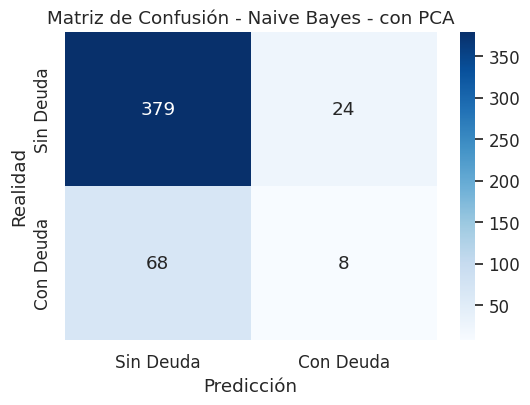

Resultados para Linear Discriminant Analysis:
Precisión: 0.84
Informe de Clasificación:
              precision    recall  f1-score   support

   Sin Deuda       0.85      0.99      0.91       403
   Con Deuda       0.43      0.04      0.07        76

    accuracy                           0.84       479
   macro avg       0.64      0.51      0.49       479
weighted avg       0.78      0.84      0.78       479




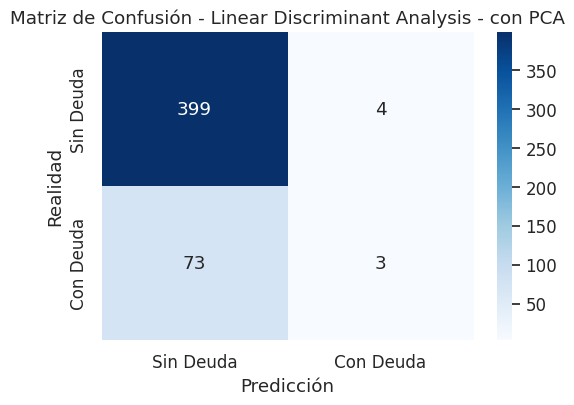

Resultados para Quadratic Discriminant Analysis:
Precisión: 0.81
Informe de Clasificación:
              precision    recall  f1-score   support

   Sin Deuda       0.84      0.94      0.89       403
   Con Deuda       0.21      0.08      0.11        76

    accuracy                           0.81       479
   macro avg       0.53      0.51      0.50       479
weighted avg       0.74      0.81      0.77       479




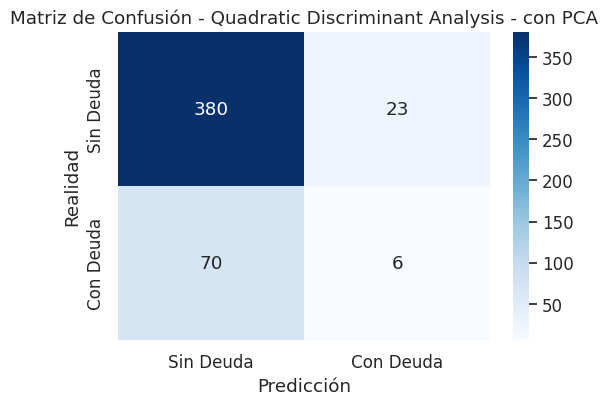

Resultados para Support Vector Machine:
Precisión: 0.84
Informe de Clasificación:
              precision    recall  f1-score   support

   Sin Deuda       0.84      1.00      0.91       403
   Con Deuda       0.00      0.00      0.00        76

    accuracy                           0.84       479
   macro avg       0.42      0.50      0.46       479
weighted avg       0.71      0.84      0.77       479




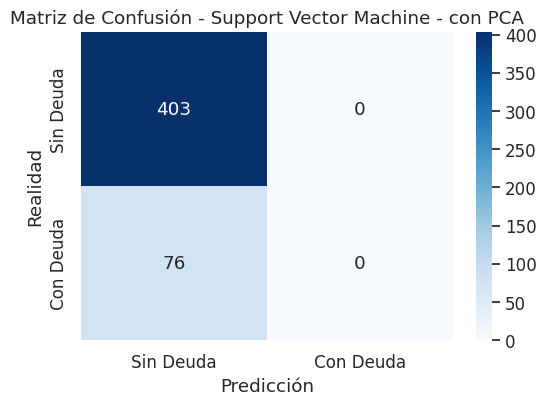

In [ ]:
from sklearn import svm  # Importar el módulo svm
from sklearn.decomposition import PCA

X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

# Normalizamos las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.05, random_state=6)

# Inicializar los modelos
gnb = GaussianNB()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
svm_clf = svm.SVC(kernel='linear', probability=True)

# Diccionario para almacenar el rendimiento de los modelos
results = {}

# Entrenar y predecir con cada modelo
models = {
    'Naive Bayes': gnb,
    'Linear Discriminant Analysis': lda,
    'Quadratic Discriminant Analysis': qda,
    'Support Vector Machine': svm_clf
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Guardar la precisión
    accuracy = accuracy_score(y_test, y_pred)

    # Informe de clasificación
    report = classification_report(y_test, y_pred, target_names=['Sin Deuda', 'Con Deuda'])

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Almacenar los resultados
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': cm
    }

    # Imprimir el rendimiento del modelo
    print(f"Resultados para {model_name}:")
    print(f"Precisión: {accuracy:.2f}")
    print(f"Informe de Clasificación:\n{report}\n")

    # Graficar la matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sin Deuda', 'Con Deuda'], yticklabels=['Sin Deuda', 'Con Deuda'])
    plt.title(f'Matriz de Confusión - {model_name} - con PCA')
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=6)

# Inicializar los modelos
models = {
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Support Vector Machine': svm.SVC(kernel='linear', probability=True)
}

# Diccionario para almacenar el rendimiento de los modelos
results = {}

# Entrenar y predecir con cada modelo
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Guardar la precisión
    accuracy = accuracy_score(y_test, y_pred)

    # Informe de clasificación
    report = classification_report(y_test, y_pred, target_names=['Sin deuda', 'Con deuda'], output_dict=True)

    # Almacenar los resultados
    results[model_name] = {
        'accuracy': accuracy,
        'report': report
    }

# Visualizar resultados
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

# Gráfico de precisión
plt.figure(figsize=(8, 4))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Precisión de Modelos de Clasificación', fontsize=13)
plt.xlabel('Modelos', fontsize=11)
plt.ylabel('Precisión', fontsize=11)
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Imprimir informes de clasificación de manera más estructurada
for model_name in model_names:
    print(f"\nResultados para {model_name}:")
    print(f"Precisión: {results[model_name]['accuracy']:.2f}")

    # Formato del informe de clasificación
    report_df = pd.DataFrame(results[model_name]['report']).transpose()
    print(report_df[['precision', 'recall', 'f1-score', 'support']])